In [125]:
import os
HOME = os.getcwd()
print("Home", HOME)

Home /home/in-s-testsrv/Desktop/assignment/sam-label/understand


In [126]:
%cd {HOME}
!mkdir {HOME}/understand/weights
%cd {HOME}/understand/weights

# !wget -q https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
# !wget -q https://dl.fbaipublicfiles.com/segment_anything/sam_vit_l_0b3195.pth
# !wget -q https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth

/home/in-s-testsrv/Desktop/assignment/sam-label/understand
mkdir: cannot create directory ‘/home/in-s-testsrv/Desktop/assignment/sam-label/understand/understand/weights’: No such file or directory
[Errno 2] No such file or directory: '/home/in-s-testsrv/Desktop/assignment/sam-label/understand/understand/weights'
/home/in-s-testsrv/Desktop/assignment/sam-label/understand


In [127]:
%pip install 'git+https://github.com/facebookresearch/segment-anything.git'

  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-hukq42zv
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-hukq42zv
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 526fd066dea338ba2ca08886853bd37ffd6a8aec
  Preparing metadata (setup.py) ... done
Note: you may need to restart the kernel to use updated packages.


In [128]:
%cd {HOME}
%pip install torch torchvision supervision 
%pip install opencv-python

/home/in-s-testsrv/Desktop/assignment/sam-label/understand
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [129]:
import torch
# set/ check device
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(DEVICE)

cuda:0


In [130]:
#set model
import os

MODEL_TYPE = "vit_h"
CHECKPOINT_PATH = '/home/in-s-testsrv/Desktop/assignment/sam-label/understand/weights/sam_vit_h_4b8939.pth'
print(CHECKPOINT_PATH, "; exist:", os.path.isfile(CHECKPOINT_PATH))


/home/in-s-testsrv/Desktop/assignment/sam-label/understand/weights/sam_vit_h_4b8939.pth ; exist: True


In [131]:
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

sam = sam_model_registry[MODEL_TYPE](checkpoint=CHECKPOINT_PATH).to(device=DEVICE)

In [132]:
import cv2
%cd {HOME}/understand
image_bgr = cv2.imread('./images/sample_image.jpg')
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
original_image = image_bgr
print(image_bgr.shape)

image_rgb = cv2.resize(image_rgb, (1024, 1024), interpolation=None)
image_bgr = cv2.resize(image_bgr, (1024, 1024), interpolation=None)
original_image = cv2.resize(original_image, (1024, 1024), interpolation=None)
print(image_rgb.shape)

[Errno 2] No such file or directory: '/home/in-s-testsrv/Desktop/assignment/sam-label/understand/understand'
/home/in-s-testsrv/Desktop/assignment/sam-label/understand
(600, 358, 3)
(1024, 1024, 3)


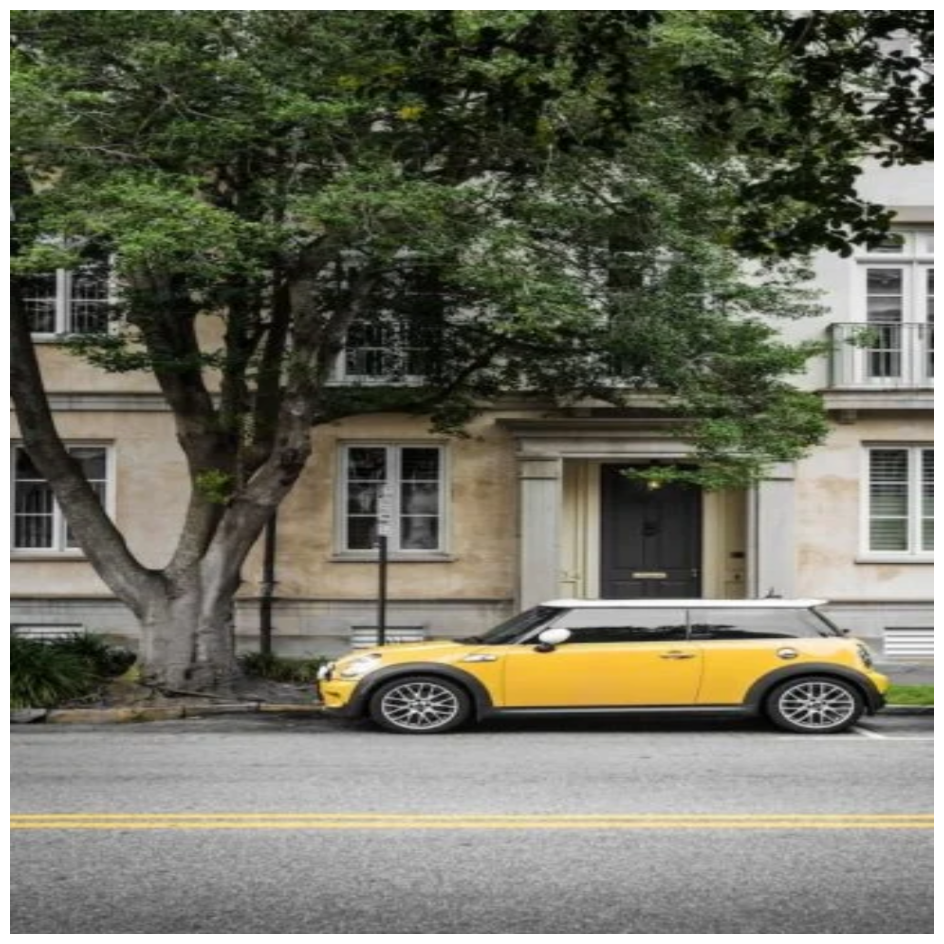

In [133]:
import supervision as sv
sv.plot_image(image_bgr)

In [134]:
mask_generator = SamAutomaticMaskGenerator(sam)
result = mask_generator.generate(image_rgb)
print(result[0].keys())
print(len(result))

dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])
63


In [135]:
bboxes = []
points = []
segmentations = []
areas = []

# understanding the result parameters & draw all segmentations
for mask in result:
    bboxes.append(mask['bbox'])
    points.append(mask['point_coords'])
    segmentations.append(mask['segmentation'])
    areas.append(mask['area'])
    print(mask['bbox'])


[342, 653, 630, 147]
[0, 0, 1023, 749]
[655, 504, 110, 147]
[0, 783, 1023, 240]
[398, 738, 112, 63]
[837, 738, 108, 63]
[548, 699, 217, 72]
[0, 692, 138, 80]
[432, 484, 43, 113]
[601, 663, 149, 38]
[952, 486, 43, 113]
[968, 684, 55, 32]
[950, 483, 73, 119]
[766, 531, 50, 120]
[0, 909, 1023, 114]
[373, 484, 43, 113]
[949, 286, 39, 59]
[548, 662, 217, 109]
[908, 347, 115, 71]
[66, 283, 43, 75]
[0, 694, 92, 78]
[973, 747, 50, 23]
[565, 497, 46, 166]
[609, 498, 44, 153]
[254, 712, 94, 33]
[752, 663, 166, 34]
[16, 281, 93, 78]
[0, 783, 1023, 107]
[1007, 485, 16, 115]
[14, 291, 37, 66]
[493, 659, 121, 44]
[2, 483, 106, 114]
[0, 774, 40, 16]
[938, 167, 85, 54]
[827, 519, 42, 131]
[4, 485, 45, 111]
[42, 423, 134, 21]
[376, 681, 86, 25]
[958, 717, 65, 30]
[0, 679, 82, 20]
[766, 533, 26, 118]
[0, 652, 141, 47]
[752, 662, 163, 107]
[901, 420, 122, 23]
[204, 507, 42, 40]
[949, 286, 39, 120]
[428, 105, 30, 17]
[688, 622, 40, 9]
[583, 685, 38, 26]
[501, 712, 38, 11]
[940, 244, 83, 107]
[905, 653, 11

In [136]:
# sort all segmentation and their bbox and point coordinates

segmentations = [segment['segmentation'] for segment in sorted(result, key=lambda x: x['area'], reverse=True)]
bboxes = [bbox['bbox'] for bbox in sorted(result, key=lambda x: x['area'], reverse=True)]
points = [point['point_coords'] for point in sorted(result, key=lambda x: x['area'], reverse=True)]



print(bboxes)
print(points)

print(len(segmentations))


[[0, 0, 1023, 749], [0, 783, 1023, 240], [0, 909, 1023, 114], [0, 783, 1023, 107], [342, 653, 630, 147], [0, 889, 1023, 20], [548, 662, 217, 109], [548, 699, 217, 72], [655, 504, 110, 147], [752, 662, 163, 107], [950, 483, 73, 119], [908, 347, 115, 71], [0, 692, 138, 80], [940, 244, 83, 107], [565, 497, 46, 166], [2, 483, 106, 114], [609, 498, 44, 153], [16, 281, 93, 78], [766, 531, 50, 120], [398, 738, 112, 63], [0, 652, 141, 47], [837, 738, 108, 63], [0, 694, 92, 78], [827, 519, 42, 131], [752, 663, 166, 34], [758, 697, 96, 72], [601, 663, 149, 38], [952, 486, 43, 113], [432, 484, 43, 113], [949, 286, 39, 120], [373, 484, 43, 113], [4, 485, 45, 111], [905, 653, 118, 55], [938, 167, 85, 54], [66, 283, 43, 75], [766, 533, 26, 118], [901, 420, 122, 23], [42, 423, 134, 21], [949, 286, 39, 59], [254, 712, 94, 33], [493, 659, 121, 44], [14, 291, 37, 66], [1007, 485, 16, 115], [968, 684, 55, 32], [958, 717, 65, 30], [376, 681, 86, 25], [662, 267, 39, 43], [40, 773, 147, 17], [40, 773, 97, 1

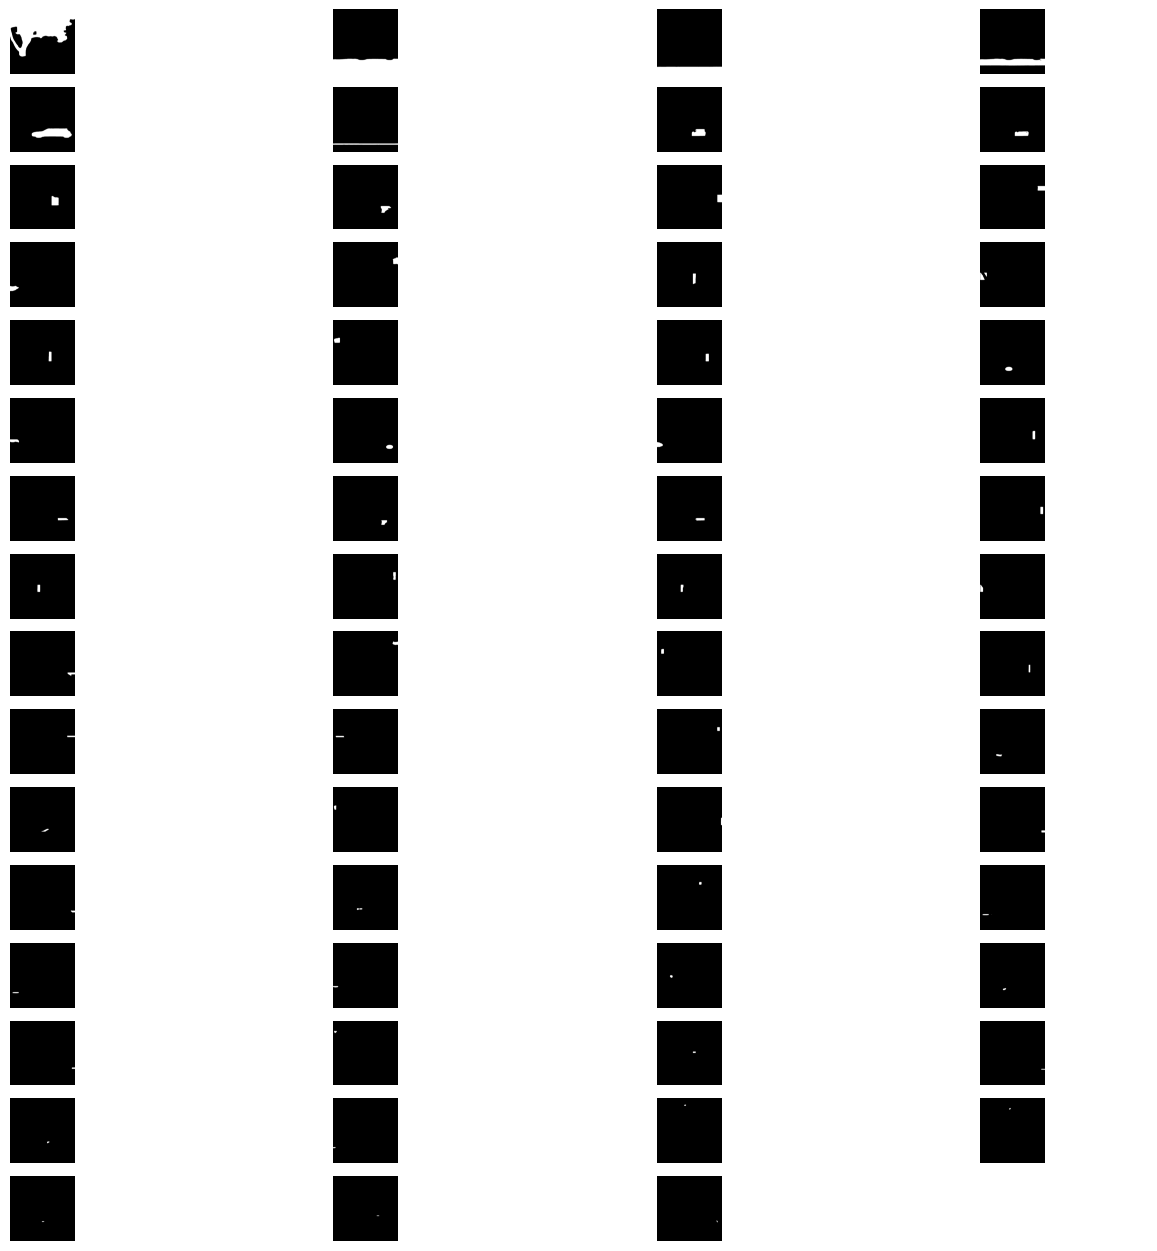

In [137]:
# draw all mask in grid
import supervision as sv

sv.plot_images_grid(
    images=segmentations,
    grid_size=(int(len(segmentations)/4+1),4),
    size = (16,16)
)

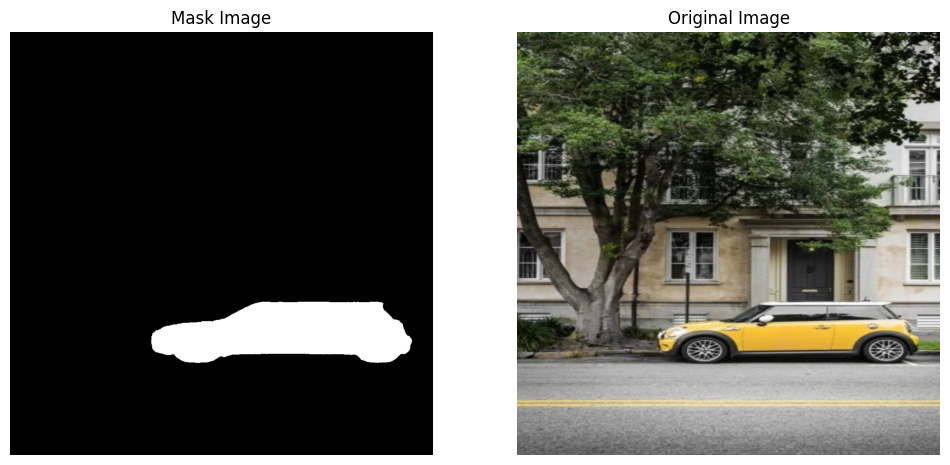

In [138]:
sv.plot_images_grid(
    images=[segmentations[4],image_bgr],
    grid_size=(1,2),
    titles=['Mask Image', 'Original Image']
)

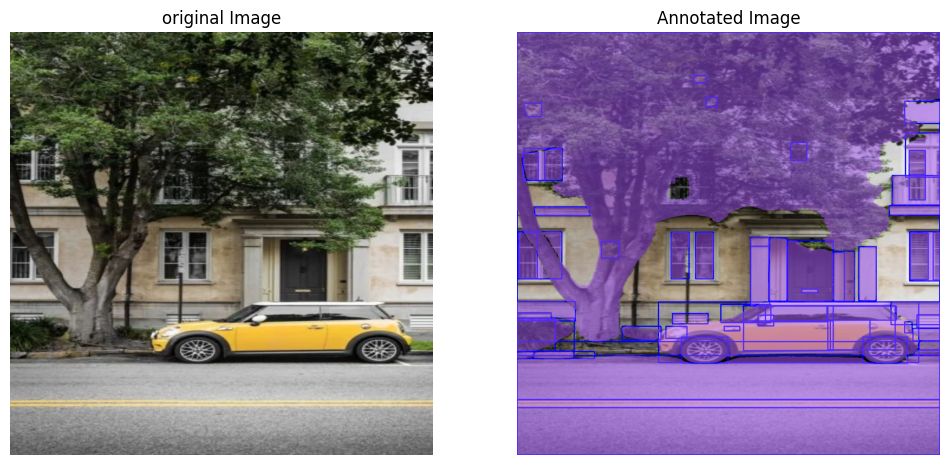

In [139]:
import supervision as sv
import numpy as np
# initialise mask & box annotator
mask_annotator = sv.MaskAnnotator()
box_annotator = sv.BoxAnnotator(color=sv.Color.BLUE)

detections = sv.Detections.from_sam(result)
detections.class_id = np.zeros(len(detections), dtype=int) 

# for displaying largest mask

annotated_image = box_annotator.annotate(scene=image_bgr.copy(), detections=detections)
annotated_image = mask_annotator.annotate(scene=annotated_image.copy(), detections=detections)

# display all segmentations with annotation and compare with original image
sv.plot_images_grid(
    images=[image_bgr, annotated_image],
    grid_size=(1,2),
    titles=['original Image', 'Annotated Image'],
)

In [140]:
# draw mask by point coordinate & bounding boxes

segment_predictor = SamPredictor(sam)
segment_predictor.set_image(image_rgb)


In [141]:
import numpy as np
input_point = np.array(points[4])
# input_point = np.array([[200,200]])
input_label = np.array([1])

masks_by_point, scores, logits = segment_predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=False
)
print(len(masks_by_point))

1


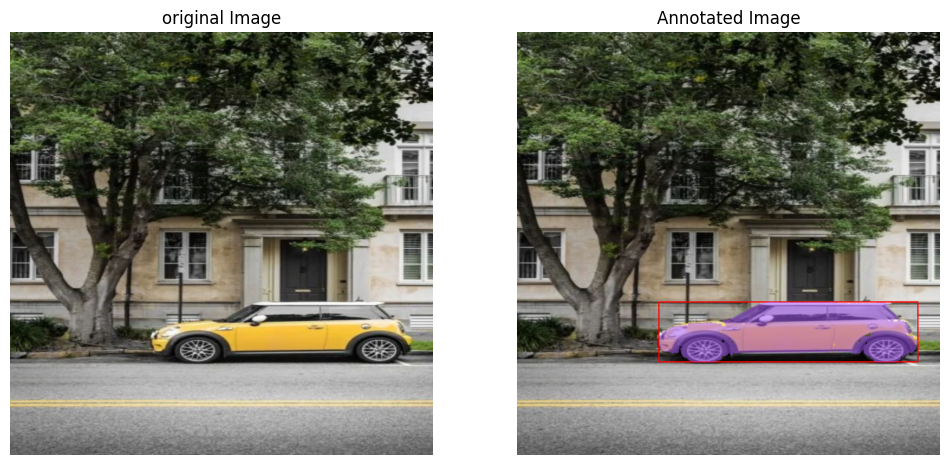

In [142]:
import supervision as sv
mask_annotator = sv.MaskAnnotator()
box_annotator = sv.BoxAnnotator(color=sv.Color.RED)

detections = sv.Detections(
    xyxy = sv.mask_to_xyxy(masks=masks_by_point),
    mask = masks_by_point

)
detections.class_id = np.zeros(len(detections), dtype=int) 

# for displaying largest mask
# detections = detections[detections.area == np.max(detections.area)]

annotated_image = box_annotator.annotate(scene=image_bgr.copy(), detections=detections)
annotated_image = mask_annotator.annotate(scene=annotated_image.copy(), detections=detections)

sv.plot_images_grid(
    images=[image_bgr, annotated_image],
    grid_size=(1,2),
    titles=['original Image', 'Annotated Image'],
)

In [143]:
# generating mask or segmentation for bounding box

x,y,w,h = bboxes[1]
mybox = np.array([x,y,x+w,y+h])

In [144]:
masks_by_bbox, scores,logits = segment_predictor.predict(
    point_coords=None,
    point_labels=None,
    box = mybox,
    multimask_output=False
)
print(len(masks_by_bbox))

1


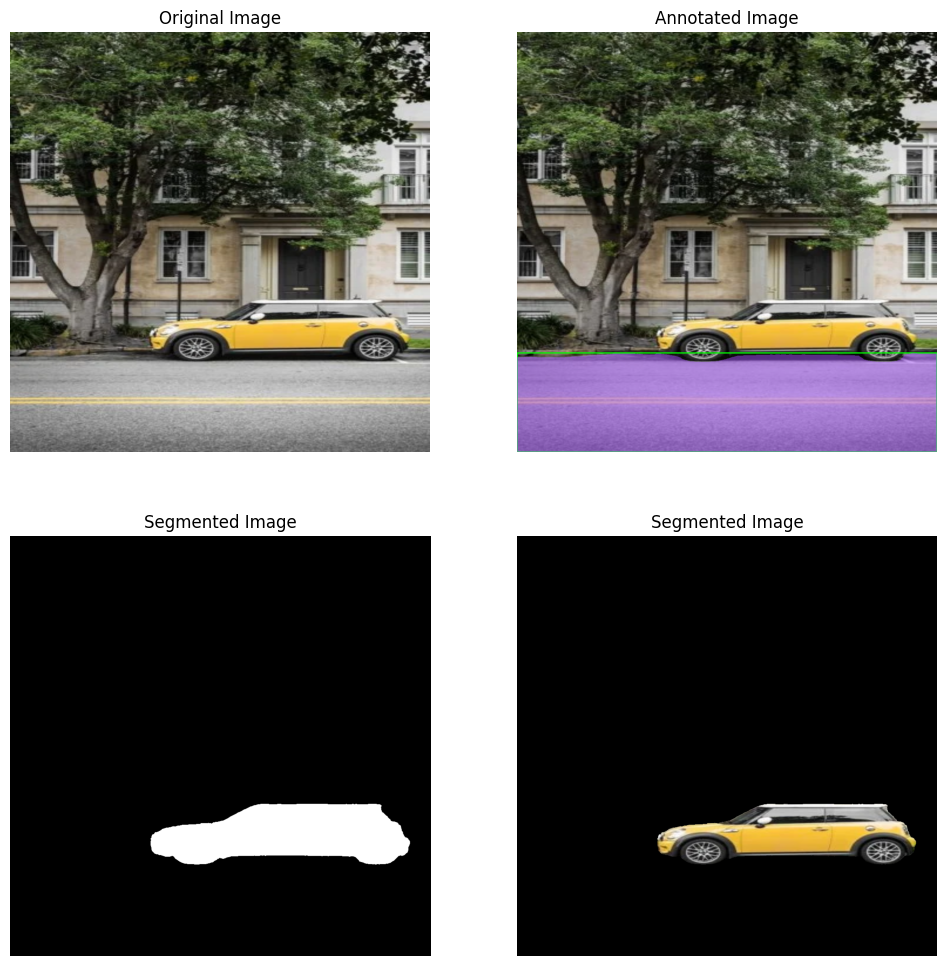

In [145]:
import supervision as sv

mask_annotator = sv.MaskAnnotator()
box_annotator = sv.BoxAnnotator(color=sv.Color.GREEN)

# point or bounding boxes mask generator for a single specific segment of image
detections = sv.Detections(
    xyxy = sv.mask_to_xyxy(masks=masks_by_bbox),
    mask=masks_by_bbox
)
detections.class_id = np.zeros(len(detections), dtype=int) 
# for displaying largest mask
detections = detections[detections.area == np.max(detections.area)]

annotated_image = box_annotator.annotate(scene=original_image.copy(), detections=detections)
annotated_image = mask_annotator.annotate(scene=annotated_image.copy(), detections=detections)

# for display segmented part of image in a white background

# 1st convert 2D numpy array ( large segmenatation) to 2D Gray Scale Image
segmented_mask = np.array(segmentations[4]*255).astype('uint8')

# 2nd convert this grayscale image to BGR image ( 3D with R, G, B channels)
segmented_image = cv2.cvtColor(segmented_mask, cv2.COLOR_GRAY2BGR)

# 3rd bitwise operator between converted 3D segmentation with original BGR image
segmented_image1 = cv2.bitwise_and(segmented_image, image_bgr)

#4th make all dark 0(zero) pixel to white pixel (1 to 255)
segmented_image1[np.where((segmented_image == [0,0,0]).all(axis=2))] == [255, 255, 255]

sv.plot_images_grid(
    images= [image_bgr, annotated_image, segmented_image, segmented_image1],
    grid_size=(2,2),
    titles = ['Original Image', 'Annotated Image', 'Segmented Image', 'Segmented Image']
)